# E-Commerce Customer Churn Prediction & Analysis

Source Kaggle : https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

# I. Problem Framing

#### Context
- The business objective to be achieved is to get a prediction system that can be used to find out which customers will churn and the factors that occur.
Target : 
 - 0 : Loyal Customers
 - 1 : Disloyal Customers

#### Goals
- The output to be generated is a prediction of the churn status of a customer. If you can predict which customer will churn, you can help the marketing team to develop marketing strategies in an effort to avoid losses in the form of losing customers.

#### Analytic Approach
- The machine learning approach that is applied this time is supervised learning in the form of classification problems. The system will predict a predetermined label (churn).

#### Evaluation Metrics
- The performance measure that will be used to help determine the quality of the final result is accuracy to determine the percentage of prediction success. Recall and precision will also be used to find out where the prediction error is.

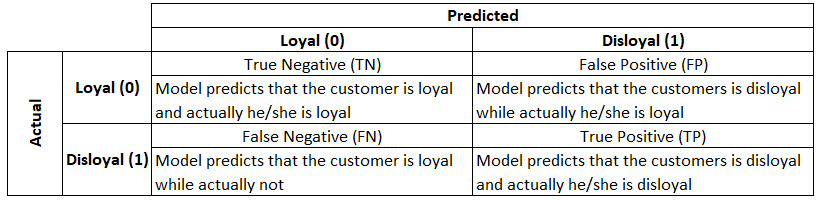

Type 1 error : False Positive (FP)
 - Risk : Wasted marketing costs, time, and resources

Type 2 error : False Negative (FN)
 - Risk : Lost customers
 
If the model incorrectly to predicts, the risk that stakeholders can experience is in the form of incorrectly giving promos to loyal customers, so that the promos given will be in vain and will increase marketing costs. In addition, the actual customer is disloyal, but the model predicts that the customer is considered loyal, then the customer will not get the promo. Therefore, the customer may completely quit and this will result in the loss of the customer.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_ecommerce = pd.read_excel('e-commerce2.xlsx')

## II. Exploratory Data Analysis

In [3]:
df_ecommerce

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [4]:
df_ecommerce

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [5]:
df_ecommerce.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [6]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

There are 5630 rows and 20 columns in this dataset, which consists of 5 categorical columns and 15 numerical columns

In [7]:
# Checking duplicate value from the datasets
df_duplicate = df_ecommerce.duplicated()
df_duplicate[df_duplicate == True].value_counts()

Series([], dtype: int64)

There is no duplicate data on datasets

In [8]:
df_ecommerce.drop('CustomerID',axis='columns',inplace=True)

Drop the CustomerID column because it will definitely not be used as a feature

#### Feature Engineering - Adding new variable

In [9]:
# Generating new features from cashback amount divided order count
df_ecommerce['avg_cashbk_per_order'] = df_ecommerce['CashbackAmount'] / df_ecommerce['OrderCount']

In [10]:
# Checking missing values 
df_ecommerce.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
avg_cashbk_per_order           258
dtype: int64

In [11]:
# Calculate the percentage of each missing value
for i in range(len(df_ecommerce.columns)):
    missing_data = df_ecommerce[df_ecommerce.columns[i]].isna().sum()
    perc = missing_data / len(df_ecommerce) * 100
    print('>%d,  Missing value: %d, percentage %.2f%%' % (i, missing_data, perc))

>0,  Missing value: 0, percentage 0.00%
>1,  Missing value: 264, percentage 4.69%
>2,  Missing value: 0, percentage 0.00%
>3,  Missing value: 0, percentage 0.00%
>4,  Missing value: 251, percentage 4.46%
>5,  Missing value: 0, percentage 0.00%
>6,  Missing value: 0, percentage 0.00%
>7,  Missing value: 255, percentage 4.53%
>8,  Missing value: 0, percentage 0.00%
>9,  Missing value: 0, percentage 0.00%
>10,  Missing value: 0, percentage 0.00%
>11,  Missing value: 0, percentage 0.00%
>12,  Missing value: 0, percentage 0.00%
>13,  Missing value: 0, percentage 0.00%
>14,  Missing value: 265, percentage 4.71%
>15,  Missing value: 256, percentage 4.55%
>16,  Missing value: 258, percentage 4.58%
>17,  Missing value: 307, percentage 5.45%
>18,  Missing value: 0, percentage 0.00%
>19,  Missing value: 258, percentage 4.58%


There are 7 columns whose data has missing values, and the percentage of these missing values range from 4.53% - 5.45%,

#### Numerical Features

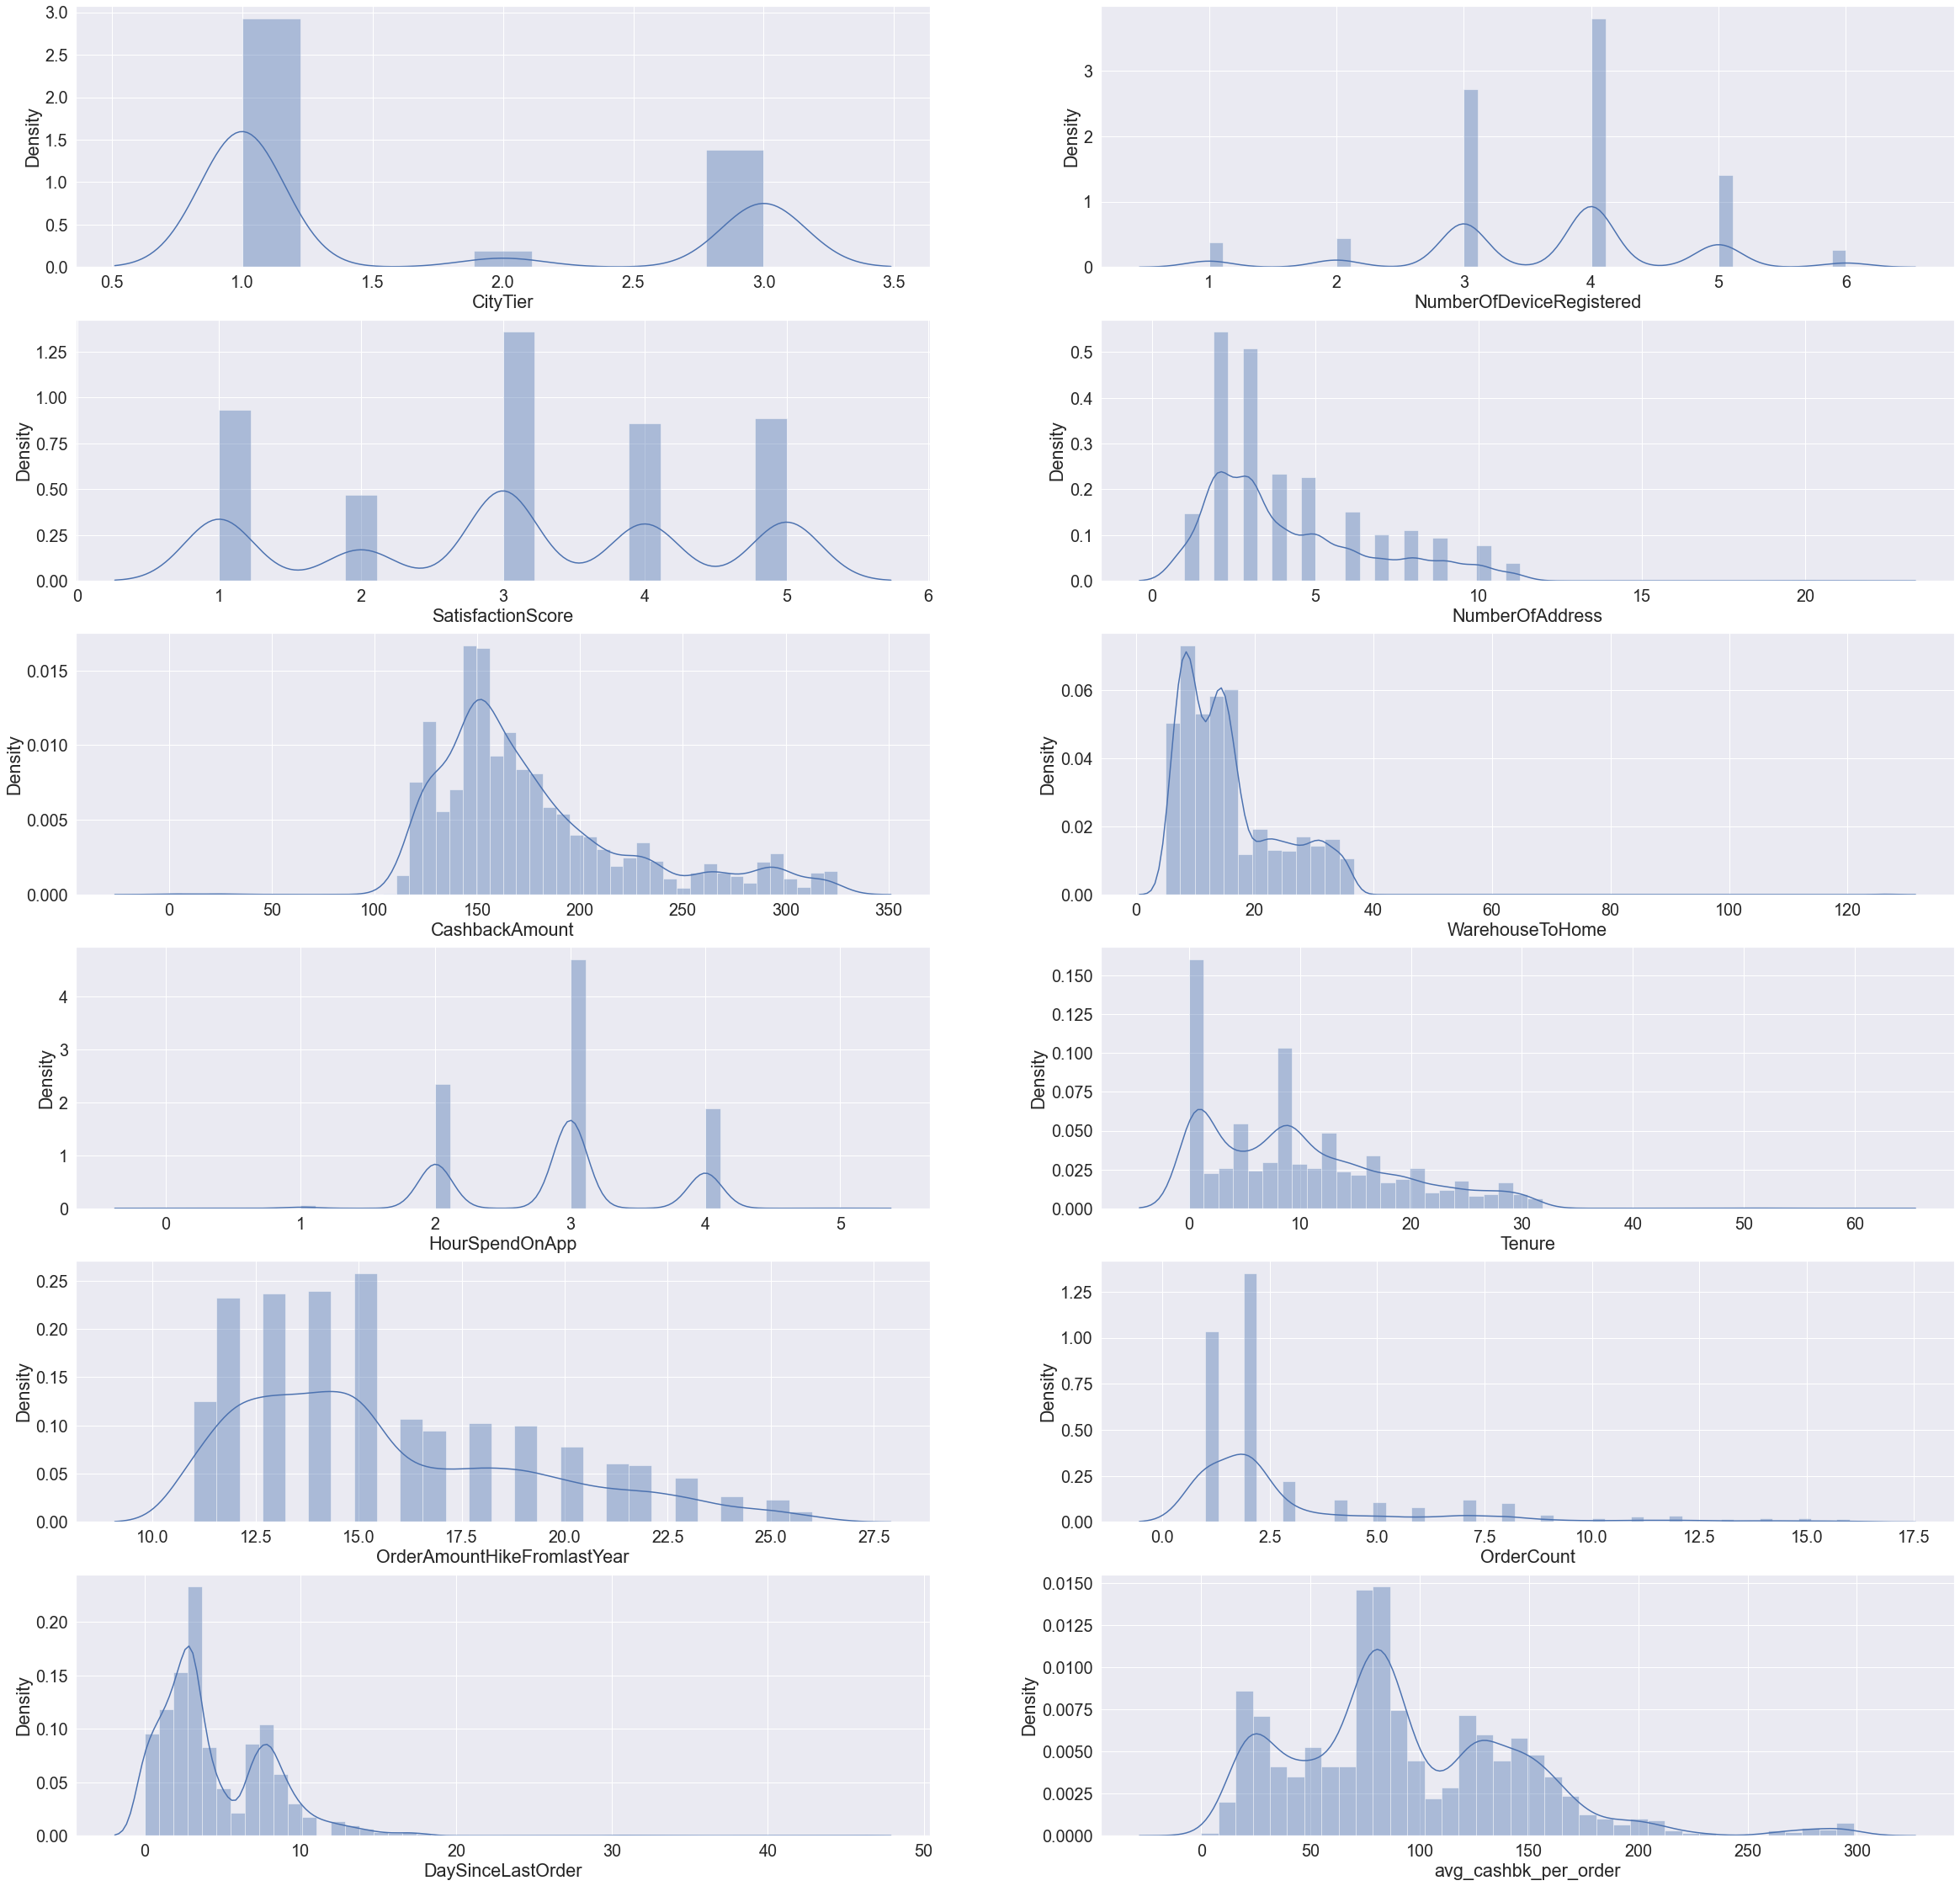

In [82]:
# The distribution of numerical variables
num = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']
fig, ax = plt.subplots(6, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.set(font_scale = 2)
    sns.distplot(df_ecommerce[i], ax=subplot)

The distribution of numerical variables tends to be skewed. To solve the missing value, we can use the median.

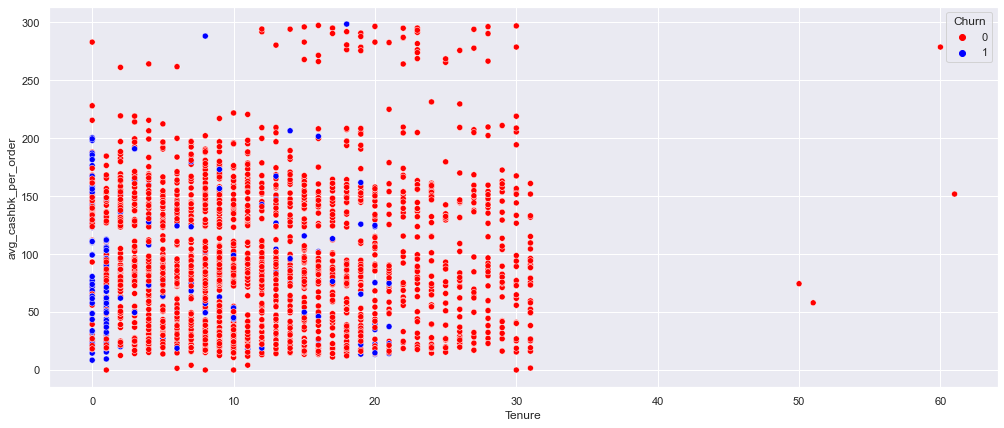

In [13]:
# Show who will churn between tenure & average cashback per order
plt.figure(figsize=(17,7))
sns.set_style("darkgrid")
sns.set(font_scale = 1)
sns.scatterplot(data=df_ecommerce,
               x='Tenure',
               y='avg_cashbk_per_order',
               hue='Churn',
               palette=['Red', 'Blue']);

- Customers who have a short tenure and the average amount of cashback per order is low will tend to churned.
- Otherwise, customers with the longer tenure tend to be more loyal

#### Binary Categorical Features

In [14]:
# Checking the categorical column that has two variable values
columns = df_ecommerce.columns
binary_cols = []
for col in columns:
    if df_ecommerce[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
        
binary_cols

['Churn', 'Gender', 'Complain']

There is a categorical column that has two variable values (or class)

#### Exploring Categorical Features

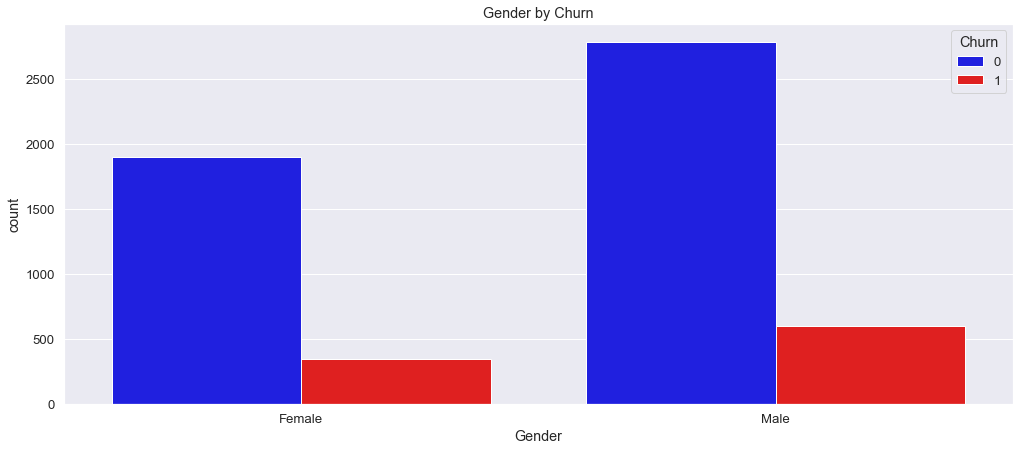

In [15]:
# Visualize gender variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='Gender',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Gender by Churn')
plt.xlabel('Gender')
plt.show()

- 60% (3384) of the customers are male, and 18% (600) of them have been churned
- 40% (2246) of the customers are female. But about 15% (348) of them are churned

Prediction Power : 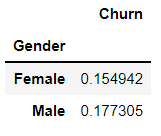

The mean churn rates for men and women are slightly different indicating that the gender variable bring a valuable prediction power to a model. Therefore, I would use the gender variable in a machine learning model.

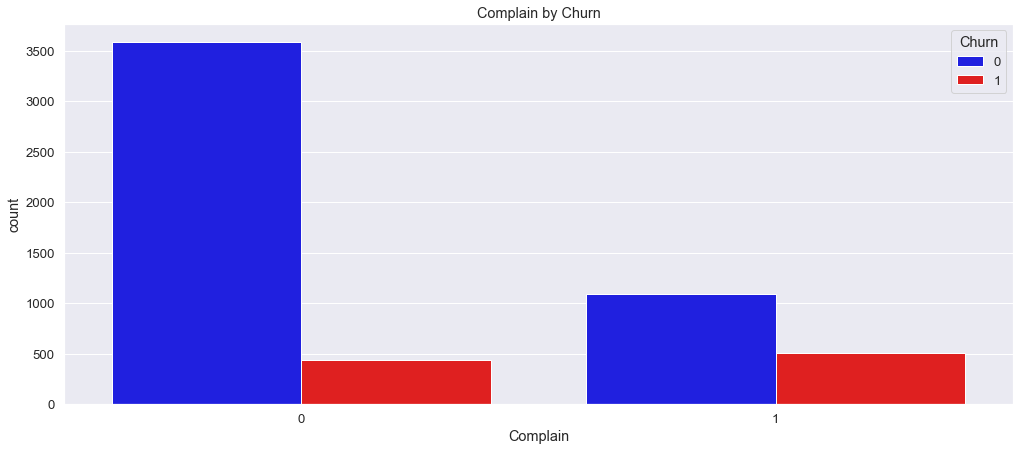

In [16]:
# Visualize complain variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='Complain',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Complain by Churn')
plt.xlabel('Complain')
plt.show()

- 28% (1604) of the customers have complained, and 32% (508) of them have been churned
- 72% (4026) of the customers do not complain. But about 11% (440) of them are churned

Prediction Power:
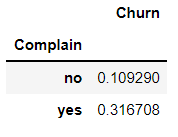

- This indicates that customers who have made complaints are more likely to do churned. 
- Otherwise, customers who never complain are more likely to be loyal.

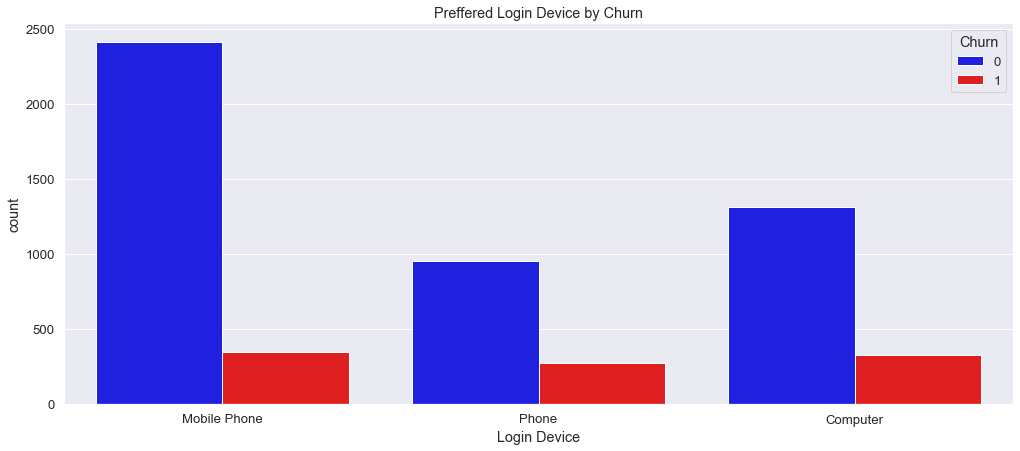

In [17]:
# Visualize preferredLoginDevice variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='PreferredLoginDevice',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Preffered Login Device by Churn')
plt.xlabel('Login Device')
plt.show()

- 49% (2765) of the customers are use mobile phone devices, and 13% (348) of them have been churned
- 29% (1634) of the customers are use computer devices, and 20% (324) of them have been churned
- 22% (1231) of the customers are use telephone devices, and 22% (276) of them have been churned

Prediction Power: 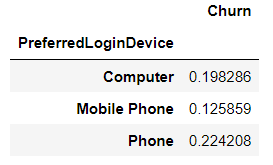

- Based on the ratio per device category, customers who use telephone devices are indicated to be disloyal.
- Customers who use Mobile Phone device indicated to be more loyal.

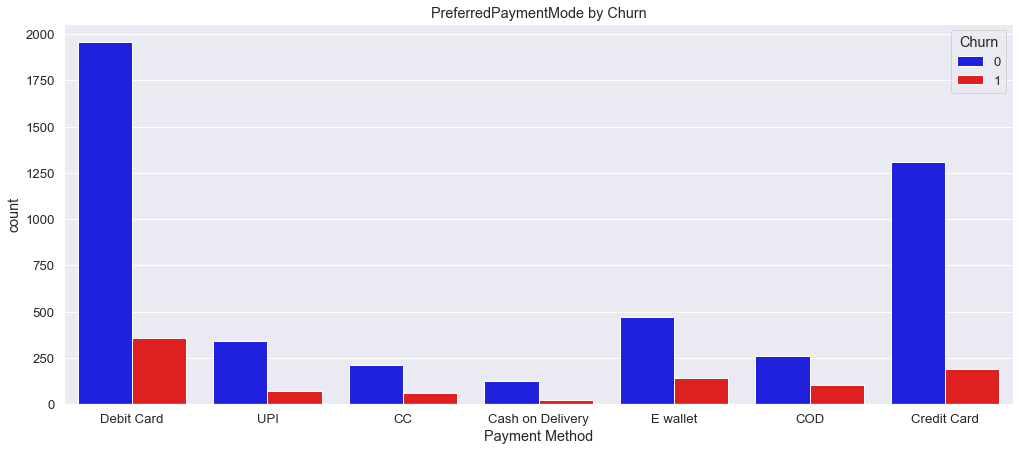

In [18]:
# Visualize PreferredPaymentMode variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='PreferredPaymentMode',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('PreferredPaymentMode by Churn')
plt.xlabel('Payment Method')
plt.show()

- 41% (2314) of the customers are use Debit Card of payment method, and 15% (356) of them have been churned.
- 27% (1501) of the customers are use Credit Card of payment method, and 13% (193) of them have been churned.
- 11% (614) of the customers are use E-Wallet of payment method, and 23% (140) of them have been churned.
- 7% (414) of the customers are use UPI of payment method, and 17% (72) of them have been churned.
- 6% (365) of the customers are use COD of payment method, and 29% (105) of them have been churned.
- 5% (273) of the customers are use CC of payment method, and 22% (59) of them have been churned.
- 3% (148) of the customers are use Cash on Delivery of payment method, and 18% (23) of them have been churned.

Prediction Power:
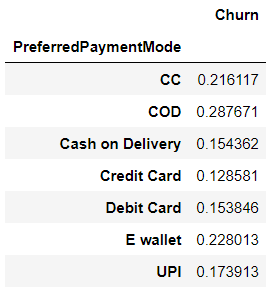

- Based on the ratio per payment method, customers who use COD of payment method are indicated to be disloyal. 
- Customers who use Credit Card of payment method indicated to be more loyal.

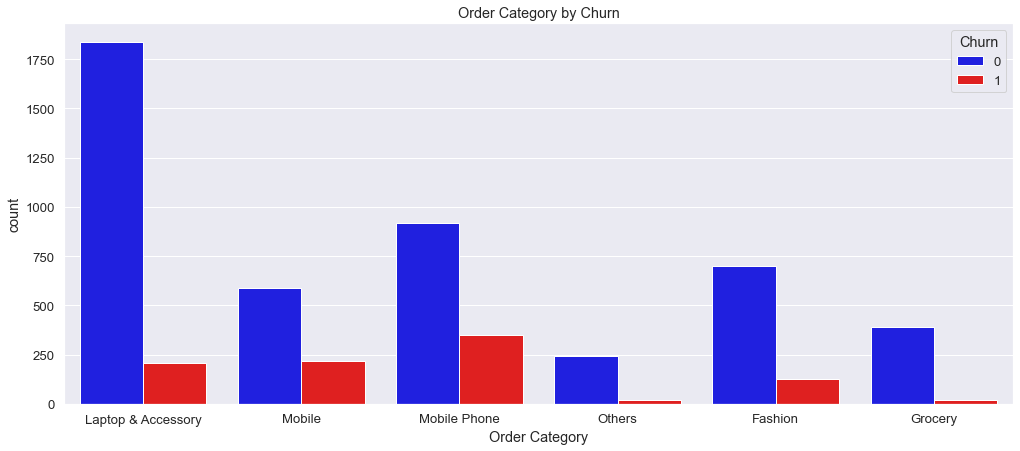

In [19]:
# Visualize order category variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='PreferedOrderCat',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Order Category by Churn')
plt.xlabel('Order Category')
plt.show()

- 36% (2050) of the customers who ordered Laptop & Accessory, and 10% (210) of them have been churned.
- 23% (1271) of the customers who ordered Mobile Phone, and 28% (350) of them have been churned.
- 15% (826) of the customers who ordered Fashion, and 15% (128) of them have been churned.
- 14% (809) of the customers who ordered Mobile, and 27% (220) of them have been churned.
- 7% (410) of the customers who ordered Grocery, and 5% (20) of them have been churned.
- 5% (264) of the customers who ordered Others, and 8% (20) of them have been churned.

Prediction Power:
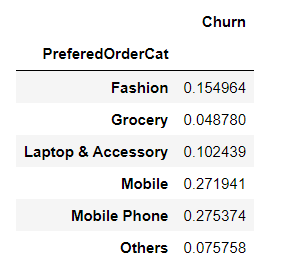

- Based on the ratio per order category, customers who ordered Mobile Phone & Mobile are indicated to be disloyal. 
- Customers who ordered Grocery indicated to be more loyal.

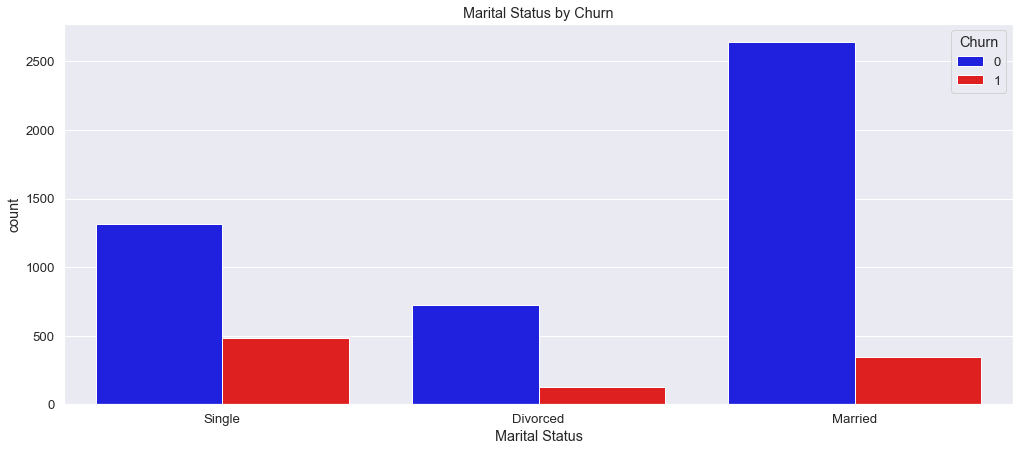

In [20]:
# Visualize martial status variable by churn
plt.figure(figsize=(17, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.countplot(x='MaritalStatus',hue='Churn', data=df_ecommerce, palette=['Blue', 'Red'])
plt.title('Marital Status by Churn')
plt.xlabel('Marital Status')
plt.show()

- 53% (2986) of the customers who Married,  and 12% (344) of them have been churned.
- 32% (1796) of the customers who Single,  and 27% (480) of them have been churned.
- 15% (848) of the customers who Divorced,  and 15% (124) of them have been churned.

Prediction Power: 
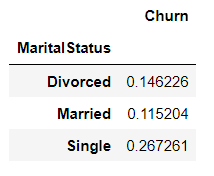

- Based on the ratio per martial status category, customers who have single status are indicated to be disloyal. 
- Customers who have married status indicated to be more loyal.

#### Analysing Churn by Each Variable

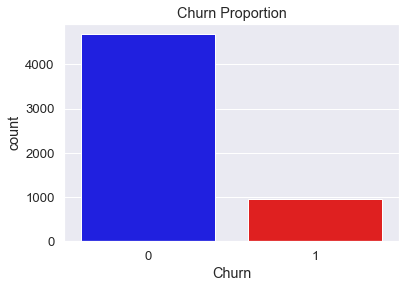

In [21]:
# Checking for proportions of churn variable
sns.countplot(x='Churn',
              data=df_ecommerce,
              palette=['Blue', 'Red'])
plt.title('Churn Proportion');

In [22]:
df_ecommerce['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

There is an imbalanced class distribution on the target variable. Positive class (Churn=1) is much less than negative class (Churn=0). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

In [23]:
# Percentage of customer churn
Churn_perc = round((df_ecommerce['Churn'][df_ecommerce['Churn']==1].count()*100/df_ecommerce['Churn'][df_ecommerce['Churn']==0].count()),2)
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


Source : https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

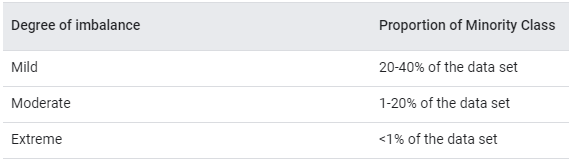

Based on the 'Proportion of Minority Class', the class imbalance that occurs is in the Mild category, which can still do downsampling to the majority class

In [24]:
# Checking for prediction power of each numerical variables
df_ecommerce[['Churn','Tenure','CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount'
             ,'WarehouseToHome', 'HourSpendOnApp','OrderAmountHikeFromlastYear',
               'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']].groupby(['Churn']).mean()

Tenure  CityTier  NumberOfDeviceRegistered  SatisfactionScore  \
Churn                                                                     
0      11.502334  1.619821                  3.639257           3.001282   
1       3.379469  1.827004                  3.934599           3.390295   

       NumberOfAddress  CashbackAmount  WarehouseToHome  HourSpendOnApp  \
Churn                                                                     
0             4.162965      180.635203        15.353931        2.925530   
1             4.466245      160.370928        17.134259        2.961798   

       OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
Churn                                                                           
0                        15.724893    1.758232    3.046601           4.807406   
1                        15.627409    1.717021    2.823656           3.236018   

       avg_cashbk_per_order  
Churn                        
0                 95.576332  
1                 88.139500

#### Outliers

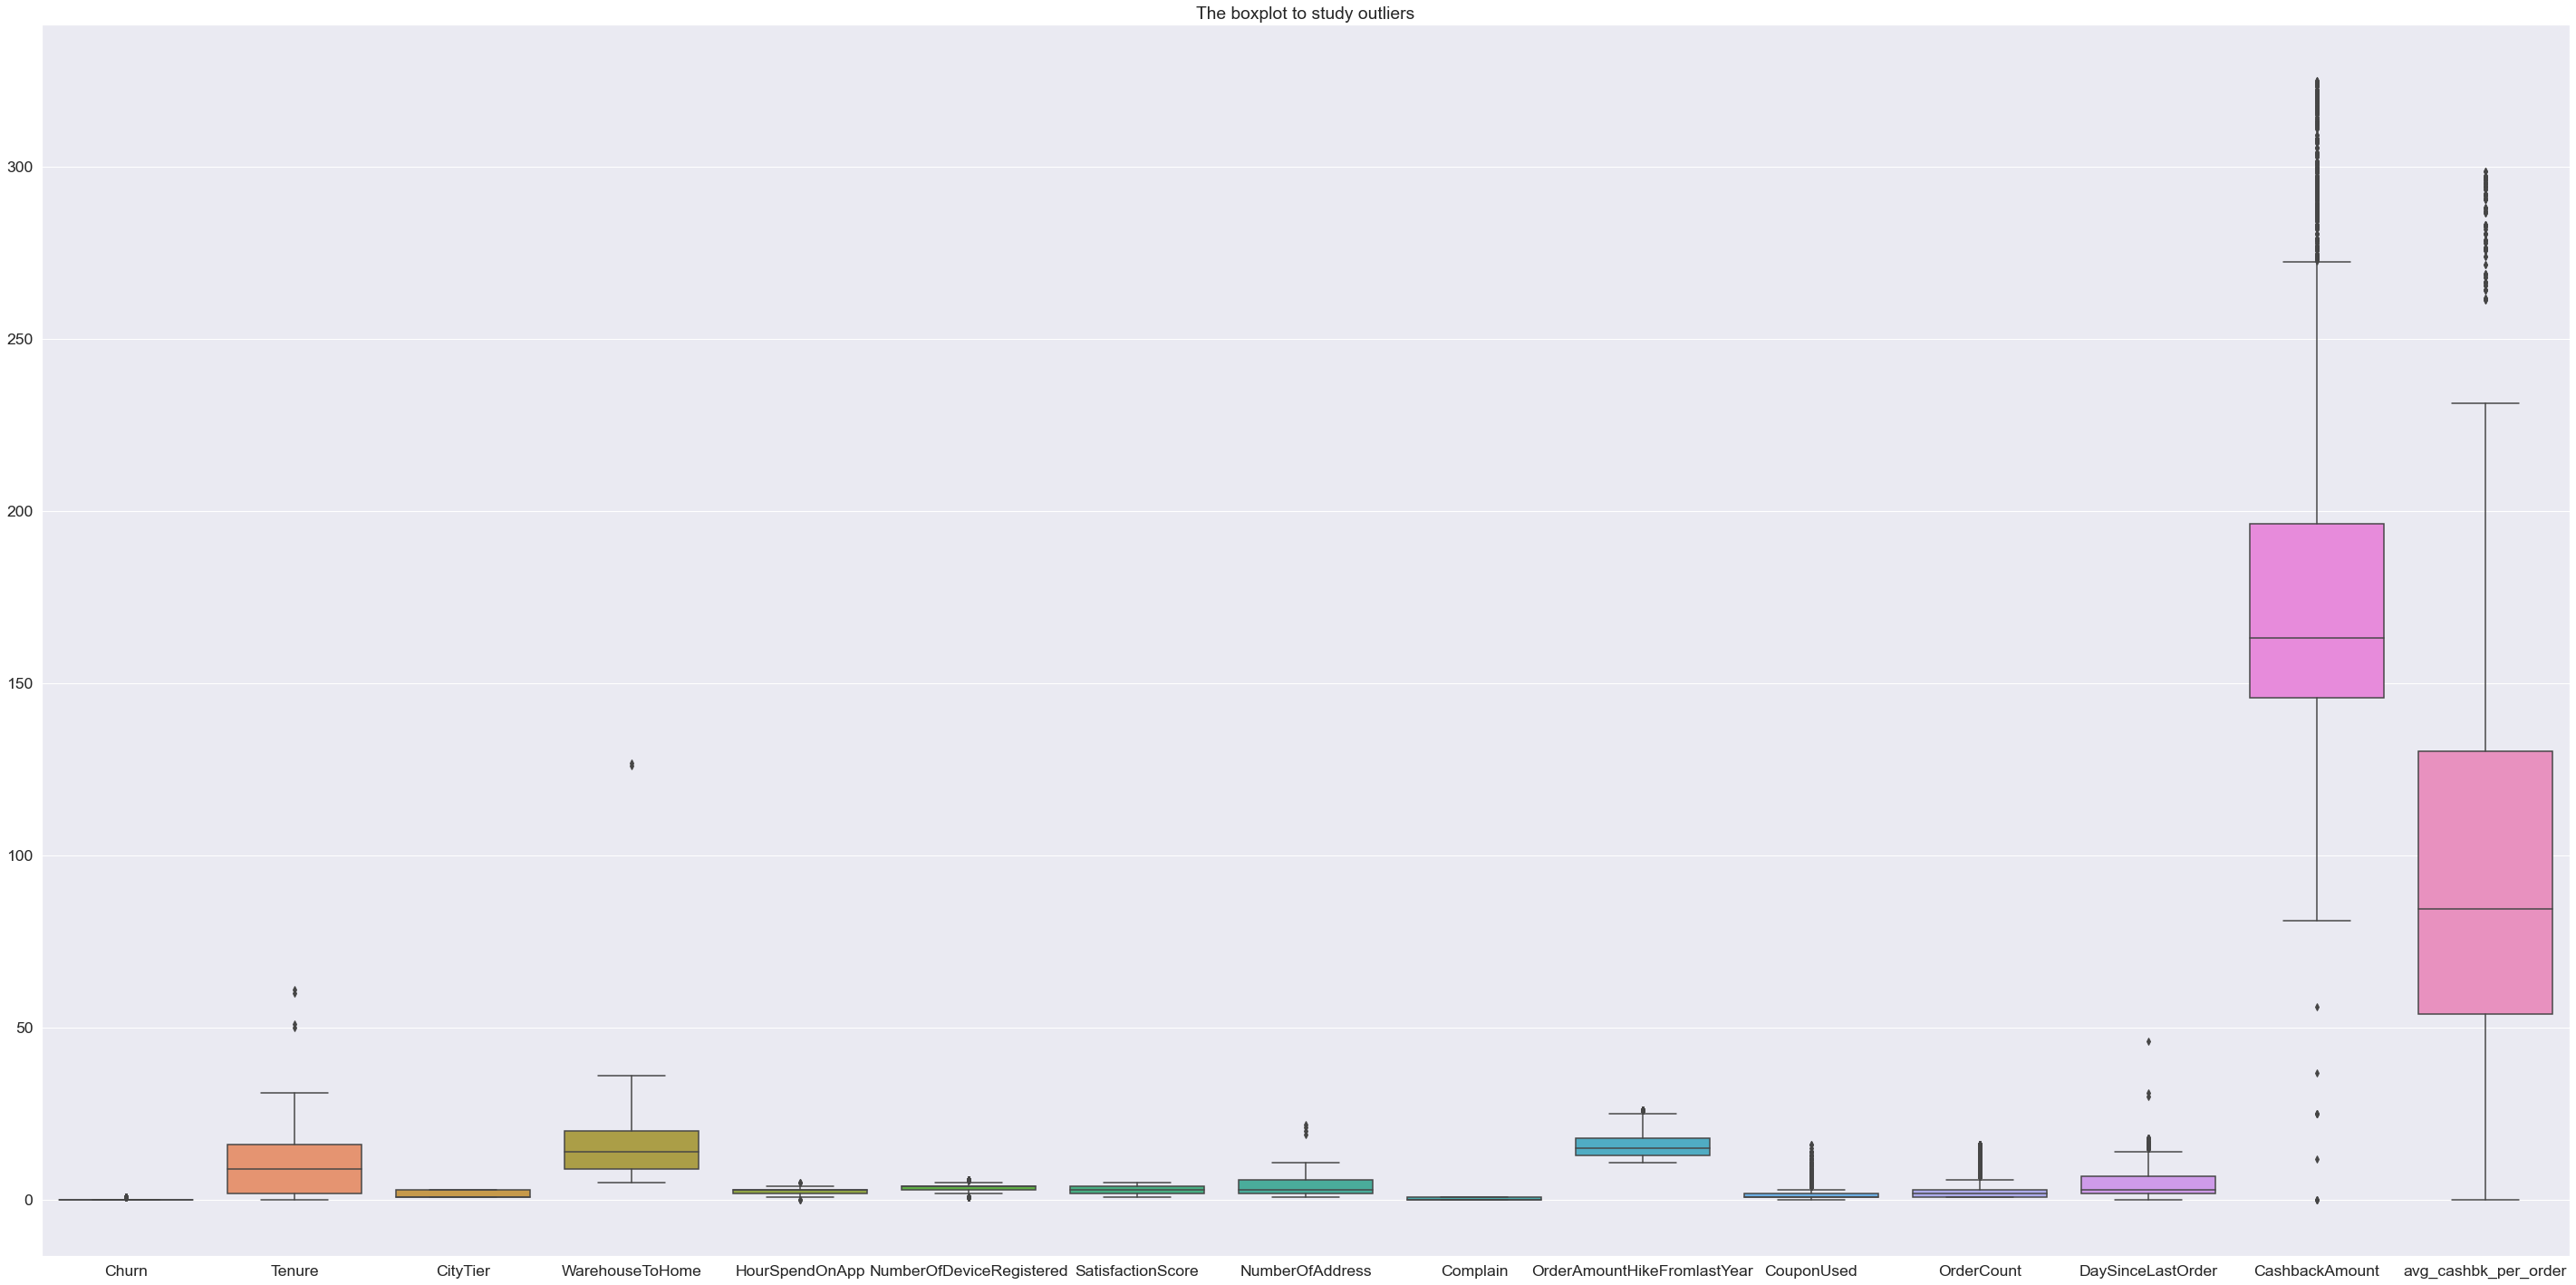

In [25]:
# Checking for outliers
sns.set(font_scale = 1.6)
plt.figure(figsize=(50,25))
sns.boxplot(data=df_ecommerce)
plt.title('The boxplot to study outliers');

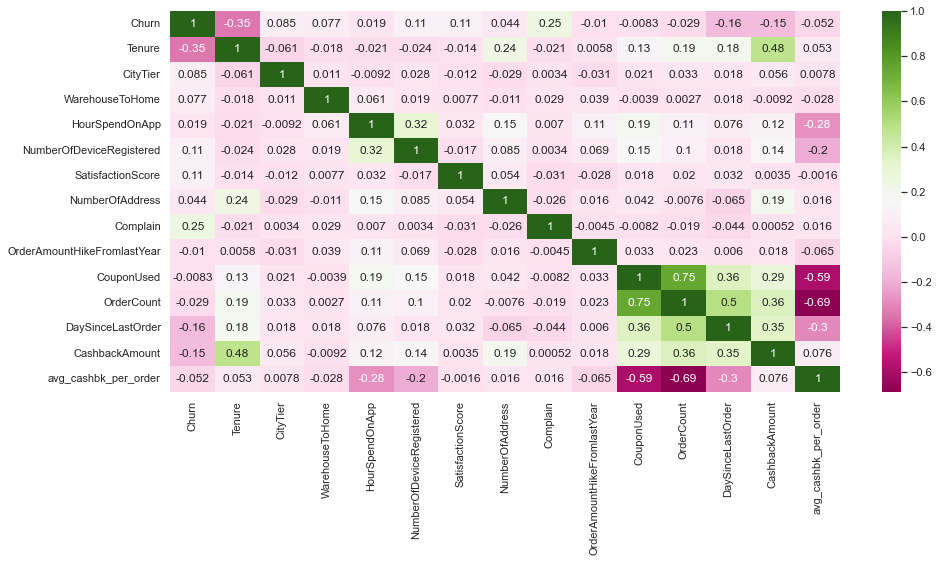

In [26]:
# Checking for correlation of each variables
plt.figure(figsize=(15,7))
sns.set(font_scale = 1)
sns.heatmap(df_ecommerce.corr(), annot=True, cmap='PiYG');

From the correlation matrix above:

- 'OrderCount' is relatively high in correlation with 'CouponUsed', the higher the number of orders, the more coupons that will be used.

CouponUsed and OrderCount variables indicate that they have multicollinearity, so the approach we take is to take out CouponUsed as a feature

## III. Data Preprocessing

#### Handle missing value 
We handle missing value with median, because the graph showed skewed distribution 

In [27]:
# For handling the missing values
for i in df_ecommerce.columns:
    if df_ecommerce[i].isnull().sum() > 0:
        df_ecommerce[i].fillna(df_ecommerce[i].median(),inplace=True)

In [28]:
# Checking missing values after fill the missing values with median
df_ecommerce.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
avg_cashbk_per_order           0
dtype: int64

#### Splitting

In [29]:
# We splitting the datasets into training set and test set
from sklearn.model_selection import train_test_split

X = df_ecommerce.drop(['Churn'], axis=1)
y = df_ecommerce['Churn']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify = y)

#### Downsampling

We use downsampling with RandomUnderSampler to handle imbalance data.

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [31]:
y_train_under.value_counts()

0    758
1    758
Name: Churn, dtype: int64

We need to encode all categorical features, and rescale the numerical features.

In [32]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

ctg_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
           'PreferedOrderCat', 'MaritalStatus']

num_cols = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order', 'Complain']


full_pipeline = ColumnTransformer([
    ('ctg_transformer', OneHotEncoder(), ctg_cols),
    ('num_transformer', RobustScaler(), num_cols)
])

full_pipeline_log = Pipeline([
    ('full_pipeline',full_pipeline),
    ('log_reg',LogisticRegression())
])

full_pipeline_knn = Pipeline([
    ('full_pipeline',full_pipeline),
    ('knn',KNeighborsClassifier())
])

full_pipeline_dt = Pipeline([
    ('full_pipeline',full_pipeline),
    ('dt',DecisionTreeClassifier())
])

full_pipeline_ada = Pipeline([
    ('full_pipeline',full_pipeline),
    ('ada',AdaBoostClassifier())
])

full_pipeline_cb = Pipeline([
    ('full_pipeline',full_pipeline),
    ('cb',CatBoostClassifier())
])

In [33]:
#  
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df = pd.DataFrame(full_pipeline.fit_transform(X_train_under, y_train_under))
df

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
4     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1511  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
1512  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
1513  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
1514  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
1515  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

       14   15   16   17   18   19   20   21   22   23    24        25  \
0     1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.5  0.50  0.544919   
1     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.25  0.073069   
2     1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.5  1.0  0.0  0.75  0.609683   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 -0.25 -0.640593   
4     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.50  0.187037   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...       ...   
1511  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.5  0.00 -0.383641   
1512  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.5 -0.25  1.317037   
1513  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.50 -0.050360   
1514  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.50  2.213005   
1515  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0 -1.0  0.0 -0.25 -0.450928   

            26   27        28   29   30        31        32   33  
0    -0.416667  1.0  0.772727  0.0  2.0  1.333333 -0.859987  0.0  
1     0.250000  0.0  0.045455 -0.2  0.0  0.166667 -0.078476  0.0  
2    -0.583333  0.0  1.136364 -0.6  0.0  0.000000  0.123511  0.0  
3     0.000000 -1.0 -0.500000 -0.4  0.0 -0.166667 -0.347105  0.0  
4     0.166667  0.0  0.772727 -0.6  0.0  0.833333 -0.035577  0.0  
...        ...  ...       ...  ...  ...       ...       ...  ...  
1511  0.083333  0.0 -0.409091 -0.4  0.0 -0.333333 -0.250386  0.0  
1512  1.750000 -1.0  0.409091 -0.6  3.5  0.000000 -0.955255  1.0  
1513  0.083333 -1.0  0.045455 -0.4 -0.5  0.000000  1.089675  0.0  
1514  0.666667  0.0 -0.409091 -0.4  3.0  0.833333 -0.822906  1.0  
1515 -0.250000 -1.0 -0.500000 -0.4  0.0 -0.166667 -0.275713  1.0  

[1516 rows x 34 columns]

## IV. Model Training

We'll select one of these algorithms :

1. Logistic Regression (Could be the simplest model we could have)
2. Decision Tree (Easy to understand and interpret)
3. K-Nearest Neighbor (This model is good for handling outliers)
4. AdaBoost (In each iteration, trying to provide excellent fit)
5. CatBoost (Easy to use, efficient, and works very well with categorical variables.)

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings('ignore')

models = [full_pipeline_log, full_pipeline_dt, full_pipeline_knn, full_pipeline_ada, full_pipeline_cb]

# prepare CV result summary table
df_results = pd.DataFrame()

for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_,X_train_under,y_train_under, cv=5, scoring=('accuracy',
                                                                           'precision',
                                                                           'recall', 'f1', 'roc_auc'), 
                               return_train_score=True)
    df_results = df_results.append({
        'Model': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(),
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(),
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
        'roc_auc (train)': cv_scores['train_roc_auc'].mean(),
        'roc_auc (val)': cv_scores['test_roc_auc'].mean()
    }, ignore_index=True)
    
df_results

Learning rate set to 0.011184
0:	learn: 0.6875252	total: 161ms	remaining: 2m 41s
1:	learn: 0.6812621	total: 164ms	remaining: 1m 21s
2:	learn: 0.6755454	total: 166ms	remaining: 55.3s
3:	learn: 0.6706478	total: 169ms	remaining: 42s
4:	learn: 0.6658088	total: 170ms	remaining: 33.9s
5:	learn: 0.6613844	total: 172ms	remaining: 28.5s
6:	learn: 0.6556430	total: 175ms	remaining: 24.8s
7:	learn: 0.6506966	total: 177ms	remaining: 21.9s
8:	learn: 0.6464115	total: 179ms	remaining: 19.7s
9:	learn: 0.6424558	total: 181ms	remaining: 17.9s
10:	learn: 0.6373230	total: 183ms	remaining: 16.5s
11:	learn: 0.6330468	total: 185ms	remaining: 15.2s
12:	learn: 0.6297592	total: 187ms	remaining: 14.2s
13:	learn: 0.6246395	total: 189ms	remaining: 13.3s
14:	learn: 0.6209207	total: 191ms	remaining: 12.6s
15:	learn: 0.6168256	total: 194ms	remaining: 11.9s
16:	learn: 0.6131095	total: 196ms	remaining: 11.3s
17:	learn: 0.6087562	total: 198ms	remaining: 10.8s
18:	learn: 0.6054018	total: 200ms	remaining: 10.3s
19:	learn: 

Model  Accuracy (train)  Accuracy (val)  \
0      LogisticRegression          0.817940        0.800117   
1  DecisionTreeClassifier          1.000000        0.837087   
2    KNeighborsClassifier          0.871701        0.780328   
3      AdaBoostClassifier          0.851583        0.812652   
4      CatBoostClassifier          0.985158        0.896433   

   Precision (train)  Precision (val)  Recall (train)  Recall (val)  \
0           0.809363         0.793378        0.831786      0.812635   
1           1.000000         0.815048        1.000000      0.872072   
2           0.850684         0.766778        0.901713      0.807407   
3           0.848387         0.802566        0.856203      0.831126   
4           0.982303         0.886132        0.988126      0.910317   

   F1 (train)  F1 (val)  roc_auc (train)  roc_auc (val)  
0    0.820421  0.802497         0.894382       0.880936  
1    1.000000  0.842575         1.000000       0.837099  
2    0.875422  0.785912         0.944137       0.852500  
3    0.852273  0.816285         0.934183       0.901912  
4    0.985204  0.897998         0.999165       0.957531

##### For the above results, the CatBoost model has the highest accuracy and recall scores among the others, but we prefer logistic regression as the model we choose. Because based on the results of score accuracy and recall, they are not too far apart and tend not to be overfitting. In addition, logistic regression is easier to interpret.

In [61]:
full_pipeline_log.fit(X_train_under,y_train_under)
print('Training score: {}' .format(full_pipeline_log.score(X_train_under,y_train_under)))
print('Test score: {}' .format(full_pipeline_log.score(X_test,y_test)))

Training score: 0.8153034300791556
Test score: 0.8019538188277087


In [63]:
# Classification report for training set
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_train_log_reg = full_pipeline_log.predict(X_train_under)
clf_report_cb = classification_report(y_train_under, y_test_log_reg)
print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       758
           1       0.81      0.82      0.82       758

    accuracy                           0.82      1516
   macro avg       0.82      0.82      0.82      1516
weighted avg       0.82      0.82      0.82      1516



In [36]:
# Classification report for testing set
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg = full_pipeline_log.predict(X_test)
clf_report_cb = classification_report(y_test, y_test_log_reg)
print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.81      0.58       190

    accuracy                           0.80      1126
   macro avg       0.70      0.80      0.72      1126
weighted avg       0.87      0.80      0.82      1126



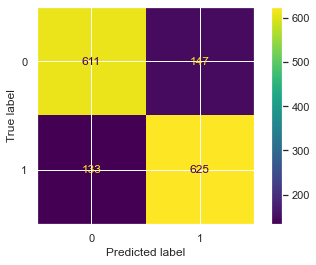

In [37]:
# Confusion metrics for training set
plot_confusion_matrix(full_pipeline_log, X_train_under, y_train_under);

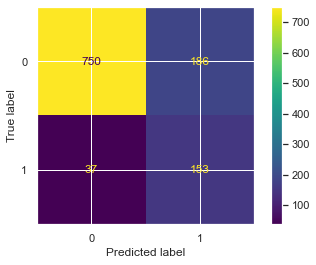

In [38]:
plot_confusion_matrix(full_pipeline_log, X_test, y_test);

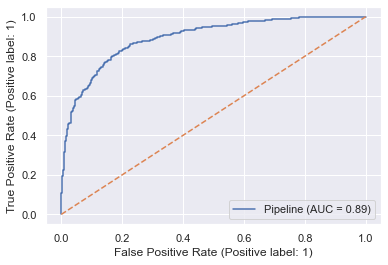

In [39]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

we can see the good result from AUC score that is 0.93

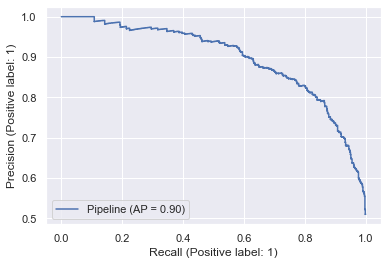

In [40]:
plot_precision_recall_curve(full_pipeline_log, X_train_under, y_train_under);

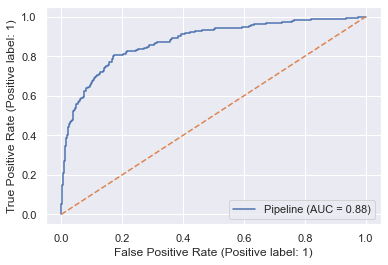

In [41]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

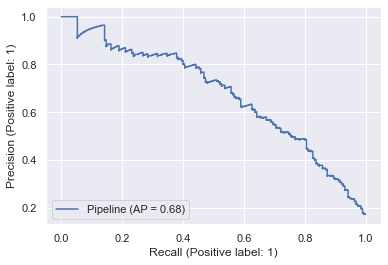

In [42]:
plot_precision_recall_curve(full_pipeline_log, X_test, y_test);

### V. Hyperparameter Tuning Logistic Regression

We try to Tuning our model to get a better result.

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'log_reg__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'log_reg__penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'log_reg__C' : [1,2, 4, 8, 10, 20, 30, 40] 
}

grid_search = GridSearchCV(full_pipeline_log, param_grid, cv=5, n_jobs=-1, scoring='recall')

grid_search.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipeline',
                                        ColumnTransformer(transformers=[('ctg_transformer',
                                                                         OneHotEncoder(),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_transformer',
                                                                         RobustScaler(),
                                                                         ['CityTier',
        

In [44]:
log_reg_best = grid_search.best_estimator_
log_reg_best.fit(X_train_under, y_train_under)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('ctg_transformer',
                                                  OneHotEncoder(),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_transformer',
                                                  RobustScaler(),
                                                  ['CityTier',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'CashbackAmount',
                                         

In [45]:
# score after tuning
log_reg_best.fit(X_train_under,y_train_under)

print('Train set:{}'.format(log_reg_best.score(X_train_under,y_train_under)))
print('Test set:{}'.format(log_reg_best.score(X_test,y_test)));

Train set:0.8139841688654353
Test set:0.8037300177619894


The results before tuning are even better (Train 82%, Test 80%) than the results after tuning (Train 81%, Test 79%), and most likely, will be the same for all results

In [46]:
# clf report for train
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_train_log_reg_best = log_reg_best.predict(X_train_under)
clf_report = classification_report(y_train_under,y_train_log_reg_best)
print(clf_report)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       758
           1       0.81      0.82      0.82       758

    accuracy                           0.81      1516
   macro avg       0.81      0.81      0.81      1516
weighted avg       0.81      0.81      0.81      1516



In [47]:
# clf report for test
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg_best = log_reg_best.predict(X_test)
clf_report_log_reg = classification_report(y_test, y_test_log_reg_best)
print(clf_report_log_reg)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.81      0.58       190

    accuracy                           0.80      1126
   macro avg       0.70      0.81      0.73      1126
weighted avg       0.87      0.80      0.82      1126



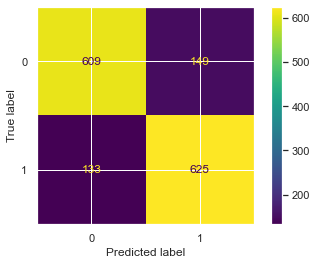

In [48]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_train_under, y_train_under);

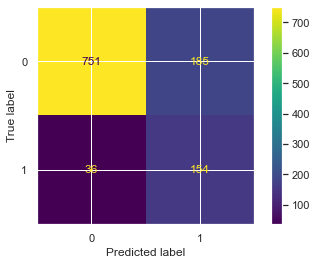

In [49]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_test, y_test);

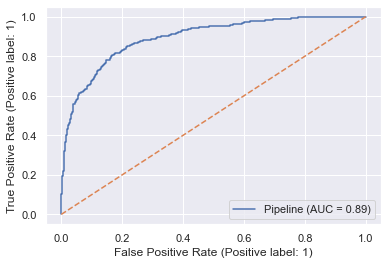

In [50]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(log_reg_best, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

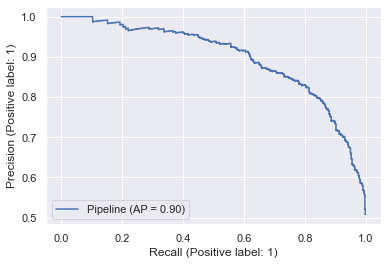

In [51]:
plot_precision_recall_curve(log_reg_best, X_train_under, y_train_under);

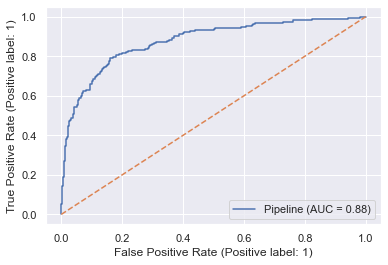

In [52]:
# roc_curve for test

plot_roc_curve(log_reg_best, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

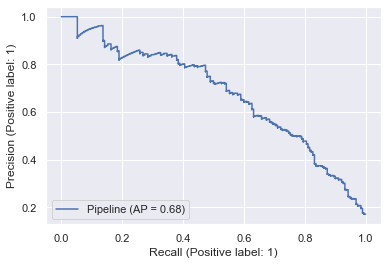

In [53]:
plot_precision_recall_curve(log_reg_best, X_test, y_test);

In [54]:
log_reg_coef = full_pipeline_log.named_steps.log_reg.coef_

feature_name = full_pipeline_log['full_pipeline'].transformers_[0][1].get_feature_names().tolist() + num_cols

df_result_coef = pd.DataFrame({
    'name':feature_name,
    'coef':log_reg_coef.flatten()
})

df_coef = df_result_coef.sort_values('coef')
df_coef

name      coef
28                       Tenure -1.810268
14        x3_Laptop & Accessory -1.573364
25               CashbackAmount -0.749819
31            DaySinceLastOrder -0.689962
16              x3_Mobile Phone -0.641010
3                         x1_CC -0.605605
19                   x4_Married -0.468795
10                    x2_Female -0.199841
15                    x3_Mobile -0.177305
9                        x1_UPI -0.164609
2                      x0_Phone -0.155504
6                x1_Credit Card -0.135414
12                   x3_Fashion -0.125138
7                 x1_Debit Card -0.108229
29  OrderAmountHikeFromlastYear -0.102300
1               x0_Mobile Phone -0.098287
27               HourSpendOnApp -0.016697
18                  x4_Divorced  0.087160
32         avg_cashbk_per_order  0.120666
11                      x2_Male  0.193017
0                   x0_Computer  0.246967
8                   x1_E wallet  0.274964
5           x1_Cash on Delivery  0.350947
20                    x4_Single  0.374810
4                        x1_COD  0.381120
22     NumberOfDeviceRegistered  0.396998
30                   OrderCount  0.423629
26              WarehouseToHome  0.557170
23            SatisfactionScore  0.571231
13                   x3_Grocery  0.609721
21                     CityTier  0.818051
24              NumberOfAddress  0.887852
33                     Complain  1.464127
17                    x3_Others  1.900271

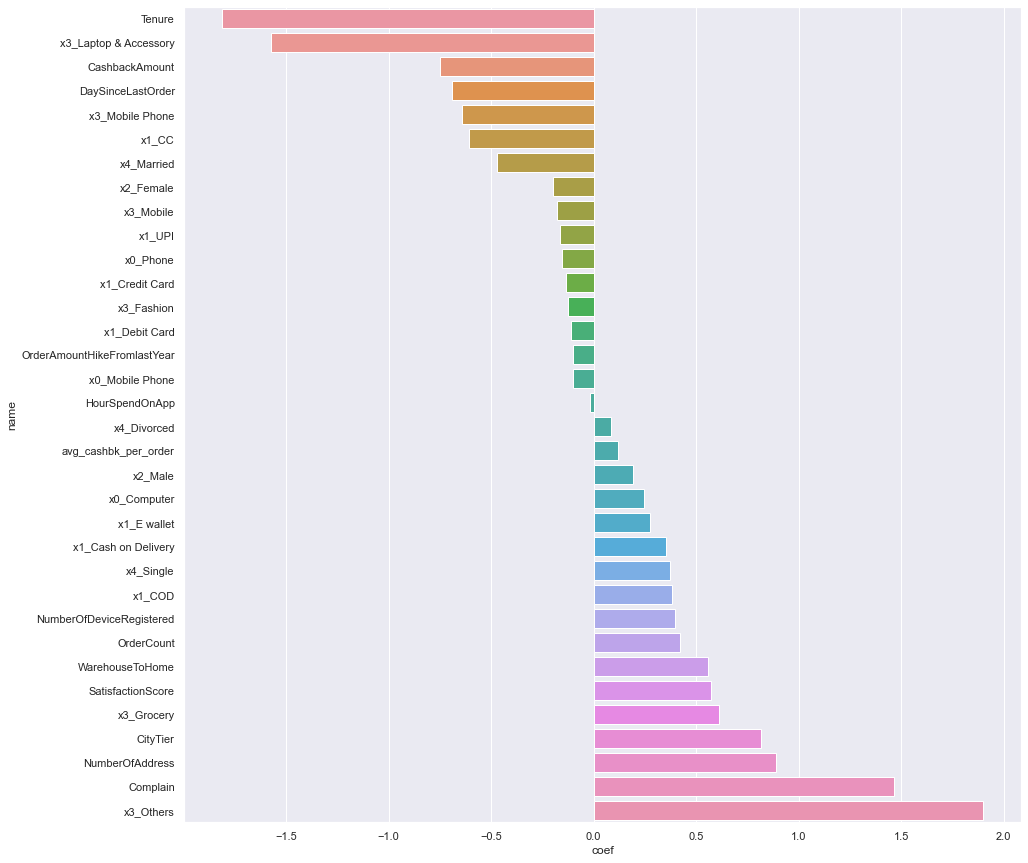

In [55]:
# Generating feature Importance
plt.figure(figsize=(15,15))
sns.barplot(data=df_coef,x='coef',y='name');

According to the model, Tenure is negatively contributes to the churn customer, and conversely, complain has positive influence on the customer churn test score, we can see, customer who send a complain tend to be a churn customer. The other most influental variables are from Prefered Order Categorical, there are Laptop & Accessory and Others

# VI. Conclusion & Recommendation

In this case, to predict which customers will churn, we use the Logistic Regression model, with an accuracy score of 82% for the training set and 80% for the testing set. And in this case, we are very concerned about the recall results, so that the True Positive obtained can be maximized. So that the predicted customer will churn, it can be predicted correctly, and the recall result on our machine learning model is 80%.

Based on feature importance, customers who tend to churn are customers who have complained. Therefore, we suggest to the marketing team to pay more attention to customer service and conduct discount promos to customers who are predicted to churn and customers with a short tenure.

Based on data from www.statista.com, "Average value of daily customer transaction" each customer has a value of Rp. 300,000.00. And if we assume that the cost of the promotion spends the marketing cost of Rp. 300/customer. Based on our calculations, the company can prevent an income loss of Rp. 34.099.500.

Source : https://www.statista.com/statistics/1242651/indonesia-average-daily-e-commerce-transaction-value/